In [2]:
import os
images_dir_path = r'C:\Users\IDEAPADGAMING\Desktop\Drawing_App\newdata\imgs'
files_name = os.listdir(images_dir_path)

In [3]:
files_name[:8] # The first 8 images

['0_bicycle.png',
 '0_car.png',
 '0_clock.png',
 '0_fish.png',
 '0_guitar.png',
 '0_house.png',
 '0_pencil.png',
 '0_tree.png']

Importing the Dependencies

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
#from google.colab.patches import cv2_imshow 
import cv2
import glob
import json

Displaying some images from the dataset

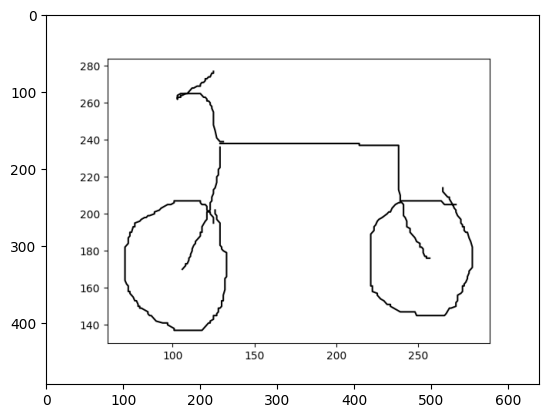

In [5]:
img = mpimg.imread(images_dir_path +'\\'+ files_name[0])
imgplot = plt.imshow(img)
plt.show()

We have a simple problem here. We have to eliminate the axis of the image as it's shown in the plot.

So we have to crop the images

In [40]:
imgs = glob.glob('../newdata/imgs/*')
no_imgs = len(imgs)
for i in range(no_imgs):
    image_filename = imgs[i].split('\\')[1] # we take just the name of the file with its extension
    
    print(image_filename, end='--') # Just to follow if any error occurs, we can easily know the image that causes the error
    
    img = Image.open(imgs[i])
    width, height = img.size

    left = 80
    upper = 60
    right = width - 80
    lower = height - 60

    # Crop the image
    cropped_img = img.crop((left, upper, right, lower))

    # Save the cropped image
    cropped_img.save('../newdata/imgs_crop/'+ image_filename)

0_bicycle.png--0_car.png--0_clock.png--0_fish.png--0_guitar.png--0_house.png--0_pencil.png--0_tree.png--100_bicycle.png--100_car.png--100_clock.png--100_fish.png--100_guitar.png--100_house.png--100_pencil.png--100_tree.png--101_bicycle.png--101_car.png--101_clock.png--101_fish.png--101_guitar.png--101_house.png--101_pencil.png--101_tree.png--102_bicycle.png--102_car.png--102_clock.png--102_fish.png--102_guitar.png--102_house.png--102_pencil.png--102_tree.png--103_bicycle.png--103_car.png--103_clock.png--103_fish.png--103_guitar.png--103_house.png--103_pencil.png--103_tree.png--104_bicycle.png--104_car.png--104_clock.png--104_fish.png--104_guitar.png--104_house.png--104_pencil.png--104_tree.png--105_bicycle.png--105_car.png--105_clock.png--105_fish.png--105_guitar.png--105_house.png--105_pencil.png--105_tree.png--106_bicycle.png--106_car.png--106_clock.png--106_fish.png--106_guitar.png--106_house.png--106_pencil.png--106_tree.png--107_bicycle.png--107_car.png--107_clock.png--107_fish.pn

Let's dispaly some of the new images after cropping

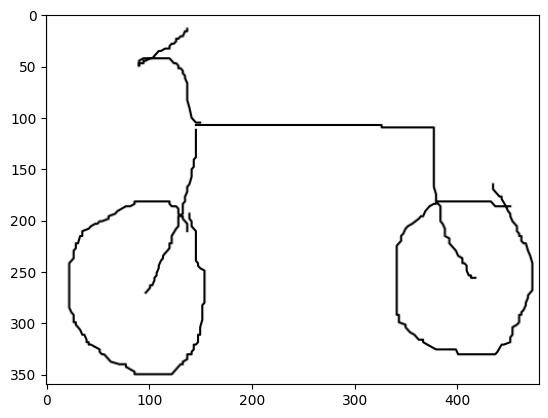

In [42]:
cropped_images = glob.glob('../newdata/imgs_crop/*')
img = mpimg.imread(cropped_images[0])
imgplot = plt.imshow(img)
plt.show()

Now that all our images are without the axis, let's continue our preprocessing process.

Let's count the number of each image type in the dataset

In [58]:
count_dict ={
    'bicycle': 0,
    'car': 0,
    'clock': 0,
    'fish': 0,
    'guitar': 0,
    'house': 0,
    'pencil': 0,
    'tree': 0
}

In [60]:
for i in range(len(cropped_images)):
    img_type = cropped_images[i].split('\\')[1].split('.')[0].split('_')[1]
    count_dict[cropped_images[i].split('\\')[1].split('.')[0].split('_')[1]] += 1

In [61]:
count_dict

{'bicycle': 716,
 'car': 716,
 'clock': 716,
 'fish': 716,
 'guitar': 716,
 'house': 716,
 'pencil': 716,
 'tree': 716}

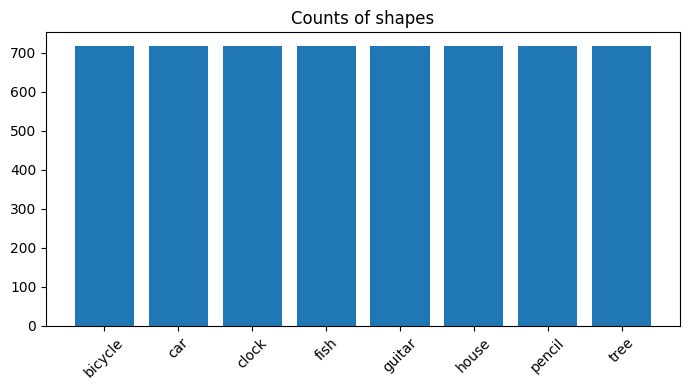

In [63]:
plt.figure(figsize=(7, 4))
plt.bar(count_dict.keys(), count_dict.values())
plt.title('Counts of shapes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Unfortunately, the dataset contains some wrong images. We have to remove them.

as in the ML_approach, we have already deleted the wrong json data from the dataset. Now, we just have to save the images that are in the json files, and we'll get the cleaned data

Session : 0


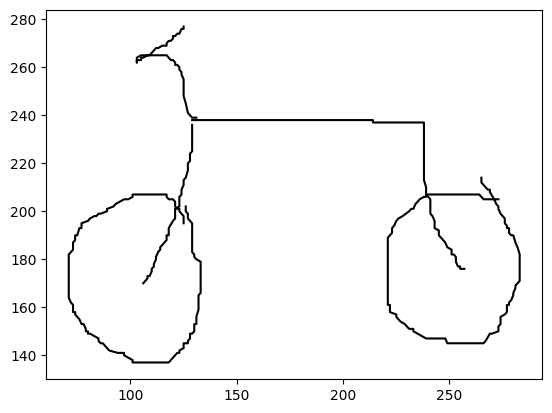

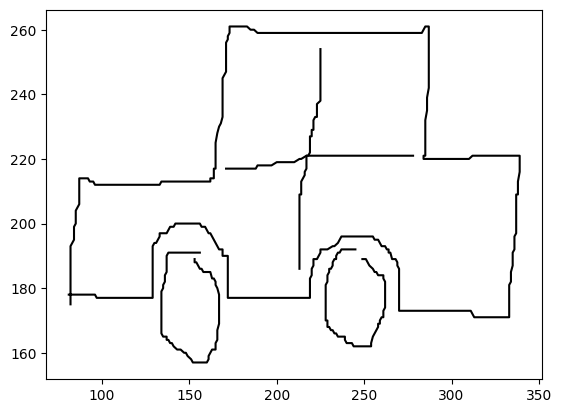

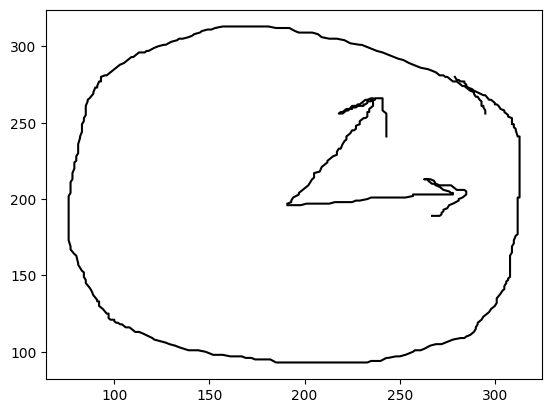

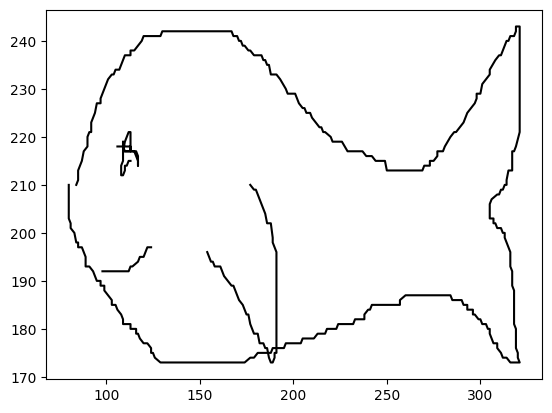

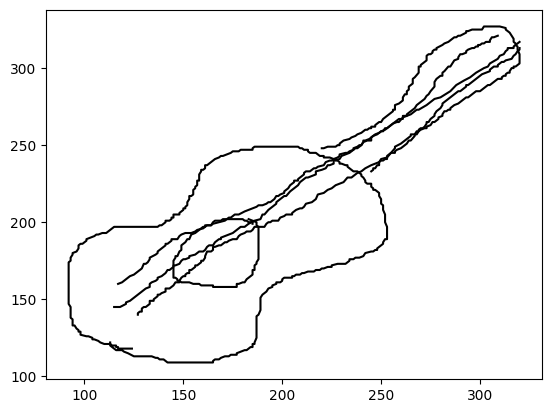

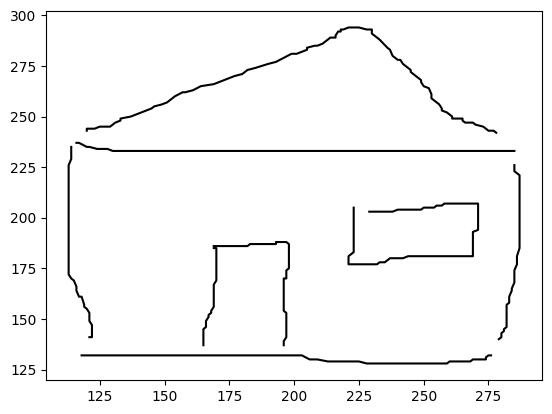

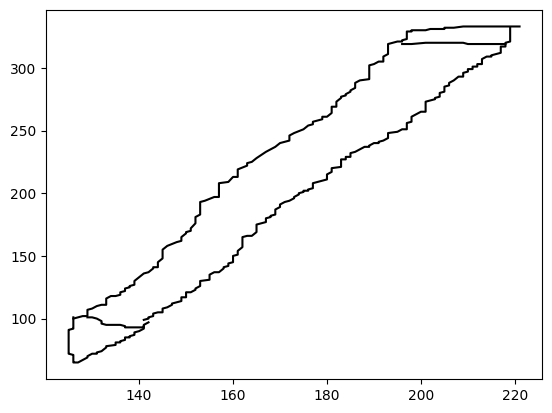

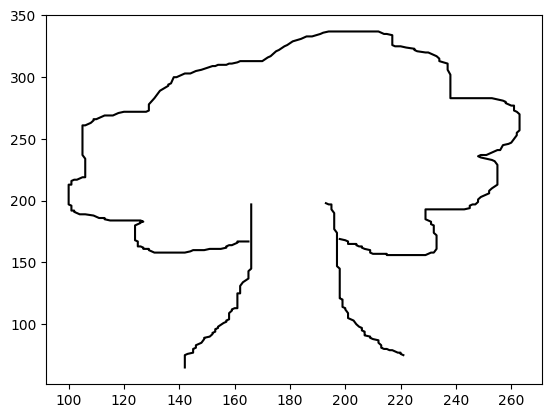

In [2]:
files = '../newdata/json/*'
for j,file in enumerate(glob.glob(files)):
    
    with open(file,'r') as f:
        d = json.load(f)
        print(f"Session : {d['session']}")
        drawings=['bicycle','car','clock','fish','guitar','house','pencil','tree']
        for draw in drawings:
            fig, ax = plt.subplots()
            for path in d['drawings'][draw]:
                path = np.array(path)
                ax.plot(path[:, 0], 400-path[:,1], color='k')
            fig.savefig(f"../newdata/clean_imgs/{d['session']}_{draw}.png")
        break